Can't train, skip it.
download https://drive.google.com/drive/folders/1LnHMj7pkJhODeZTNHW-UcUZxybKbQmTB
pkl file in OneNet file,onenet.res18.dcn.yaml into projects/OneNet/configs 
download these images https://www.kaggle.com/shamsaddin97/image-captioning-dataset-random-images and upload as images.zip,unzip in to /OneNet.
onenet_r18dcn.phy model into projects/OneNet. 
change models in code from 50 to 18.
go into projects\OneNet\configs\onenet.res18.dcn.yaml and change the years "coco_2017_train" and "coco_2017_val" to 2014 if you want to work with that.

In [ ]:
!git clone https://github.com/PeizeSun/OneNet.git

In [ ]:
cd OneNet

In [ ]:
!mkdir "save_images"

#  installing torchvison according to your cuda version

In [68]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [69]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


# restart runtime after installing

In [70]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [71]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


# install onenet

In [ ]:
!python setup.py build develop

# link coco datset to OneNet dateset folder
## download COCO dataset and then link the folder with OneNet

In [ ]:
#!wget http://images.cocodataset.org/zips/train2017.zip
#!unzip train2017.zip -d datasets/coco/
#!rm train2017.zip

In [72]:
!mkdir -p datasets/coco
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d datasets/coco/
!rm val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d datasets/coco/ && rm annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: datasets/coco/val2017/000000577584.jpg  
 extracting: datasets/coco/val2017/000000346905.jpg  
 extracting: datasets/coco/val2017/000000433980.jpg  
 extracting: datasets/coco/val2017/000000228144.jpg  
 extracting: datasets/coco/val2017/000000041872.jpg  
 extracting: datasets/coco/val2017/000000117492.jpg  
 extracting: datasets/coco/val2017/000000368900.jpg  
 extracting: datasets/coco/val2017/000000376900.jpg  
 extracting: datasets/coco/val2017/000000352491.jpg  
 extracting: datasets/coco/val2017/000000330790.jpg  
 extracting: datasets/coco/val2017/000000384850.jpg  
 extracting: datasets/coco/val2017/000000032735.jpg  
 extracting: datasets/coco/val2017/000000197004.jpg  
 extracting: datasets/coco/val2017/000000526751.jpg  
 extracting: datasets/coco/val2017/000000041488.jpg  
 extracting: datasets/coco/val2017/000000153632.jpg  
 extracting: datasets/coco/val2017/000000501523.jpg  
 extracting: datasets/coco/val2

In [66]:
#import shutil
#shutil.rmtree('datasets/coco/train2014') 

In [73]:
pip install -U iopath

Requirement already up-to-date: iopath in /usr/local/lib/python3.7/dist-packages/iopath-0.1.8-py3.7.egg (0.1.8)


# train ONeNet

# Evaluate

In [74]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS projects/OneNet/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'projects/OneNet/onenet_r18dcn.pth'], resume=False)
[06/04 01:59:32 detectron2]: Rank of current process: 0. World size: 1
[06/04 01:59:34 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.0
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr

# Visualize
install opencv additinoally for visualize

In [ ]:
!unzip images.zip

In [75]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input images/* --output save_images --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS projects/OneNet/onenet_r18dcn.pth

[06/04 02:04:32 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['images/0.jpg', 'images/1002.jpg', 'images/1005.jpg', 'images/1008.jpg', 'images/1011.jpg', 'images/1014.jpg', 'images/1017.jpg', 'images/1020.jpg', 'images/1023.jpg', 'images/1026.jpg', 'images/1029.jpg', 'images/102.jpg', 'images/1032.jpg', 'images/1035.jpg', 'images/1038.jpg', 'images/1041.jpg', 'images/1044.jpg', 'images/1047.jpg', 'images/1050.jpg', 'images/1053.jpg', 'images/1056.jpg', 'images/1059.jpg', 'images/105.jpg', 'images/1062.jpg', 'images/1065.jpg', 'images/1068.jpg', 'images/1071.jpg', 'images/1074.jpg', 'images/1077.jpg', 'images/1080.jpg', 'images/1083.jpg', 'images/1086.jpg', 'images/1089.jpg', 'images/108.jpg', 'images/1092.jpg', 'images/1095.jpg', 'images/1098.jpg', 'images/1101.jpg', 'images/1104.jpg', 'images/1107.jpg', 'images/1110.jpg', 'images/1113.jpg', 'images/1116.jpg', 'images/1119.jpg', 'images/111.jpg', 'images/

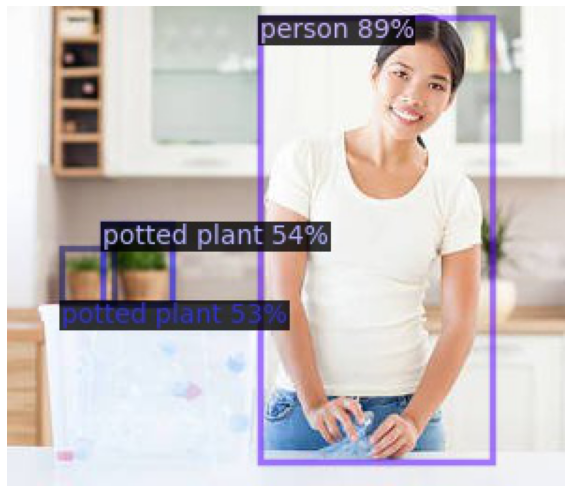

In [132]:
filename = '1065.jpg'
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
img = plt.imread("save_images/" + filename)  
plt.imshow(img)
plt.axis('off')
plt.show()
#1065 50 9 6 18 21 108 150 378 366 1083 1404 891 1677 2088 2520 3639 4779  5820